Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 128)       

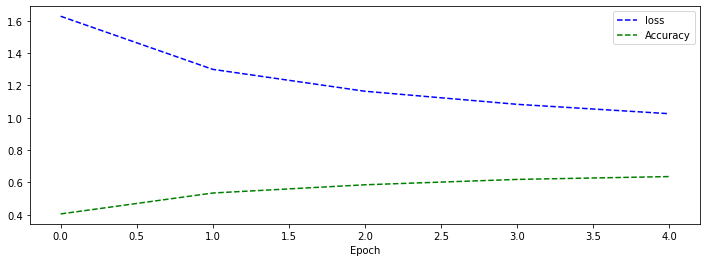

최적화 완료!

===========================test results===========================
313/313 - 1s - loss: 0.9085 - accuracy: 0.6835

 Accuracy: 0.6835


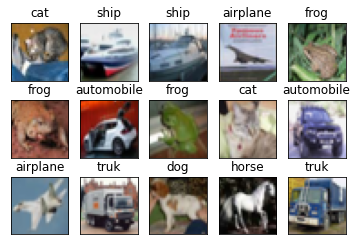

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truk']

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images = train_images / 255.0 # 0~1 정규화
test_images = test_images / 255.0

from tensorflow.keras.utils import to_categorical

#model
# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 만든다
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#학습과정 설정
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, train_labels, epochs=5, batch_size=10, validation_split=0.2)

# 모델이 학습되는 과정을 그래프로 표현
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g--', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, test_labels, verbose=2)[1])) # verbose=2로 설정하여 막대가 나오지 않도록 설정

# 테스트 영상 중 10개만 출력하고 예측결과를 그림 위에 표시해 보자.
fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()
print("\n==================================================================")